# Divergence RSI - Strategy - Backtesting 

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

/home/zuongthao/PycharmProjects/algo-stock/venv/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    print(algo_dir)
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-02-14 14:15:00,1343.0,1343.0,1340.3,1341.3,7141
2025-02-14 14:20:00,1340.9,1341.9,1340.5,1341.4,4593
2025-02-14 14:25:00,1341.1,1342.5,1340.7,1342.5,4207


In [6]:
SHIFT_BARS = 1
def cal_signal(r):
    signal = ''
    if r['HH'] and r['Lower_RSI'] and r['RSI'] > 65:
        signal = 'short'
    elif r['LL'] and r['Higher_RSI'] and r['RSI'] > 65:
        signal = 'long'
    return signal

def prepare_data(data):
    data['RSI'] = ta.rsi(data["Close"], length=14)
    # Identify Higher High (HH) and Lower RSI
    data['HH'] = data['High'] > data['High'].shift(SHIFT_BARS).rolling(20).max() + 0.1
    data['Lower_RSI'] = data['RSI'] < data['RSI'].shift(SHIFT_BARS).rolling(20).max()
    # Identify Lower Low (LL) and Higher RSI
    data['LL'] = data['Low'] < data['Low'].shift(SHIFT_BARS).rolling(20).min() - 0.1
    data['Higher_RSI'] = data['RSI'] > data['RSI'].shift(SHIFT_BARS).rolling(20).min()
    #
    data['signal'] = data.apply(lambda r: cal_signal(r), axis=1)
    return data

In [7]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [8]:
prepared_data[prepared_data.signal != '']

,Open,High,Low,Close,Volume,RSI,HH,Lower_RSI,LL,Higher_RSI,signal
Date,,,,,,,,,,,
2020-11-03 09:00:00,909.3,909.4,908.5,908.8,1435,66.672481,True,True,False,True,short
2020-11-04 10:20:00,911.8,911.8,911.0,911.1,2423,65.668108,True,True,False,True,short
2020-11-04 13:55:00,912.8,917.2,912.5,916.3,5238,66.296297,True,True,False,True,short
2020-11-04 14:00:00,916.6,918.1,916.4,916.7,5942,67.446991,True,True,False,True,short
2020-11-05 13:00:00,918.5,919.9,918.5,919.1,2509,67.346144,True,True,False,True,short
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 09:15:00,1340.7,1341.4,1339.9,1340.3,3762,76.870182,True,True,False,True,short
2025-02-12 10:05:00,1340.6,1342.0,1340.5,1340.6,5056,71.004550,True,True,False,True,short
2025-02-13 13:20:00,1335.9,1336.6,1335.1,1335.6,6156,67.764149,True,True,False,True,short


In [9]:
class MainStrategy(Strategy):
    reward_on_risk = 7
    def init(self):
        self._broker._cash = 2500
        super().init()

    def next(self):
        super().next()
        _time = self.data.index
        current_time = _time[-1]
        if current_time.hour == 14 and current_time.minute >= 25:
            if self.position.is_long or self.position.is_short:
                self.position.close()
            return

        signal = self.data.signal[-1]
        close_price = self.data.Close[-1]
        open_price = self.data.Open[-1]
        low_price = self.data.Low[-1]
        high_price = self.data.High[-1]
        if signal == 'long':
            if self.position and self.position.is_short:
                self.position.close()
            if not self.position:
                buy_price = close_price
                sl = low_price - 0.1
                tp = buy_price + self.reward_on_risk * (buy_price - sl)
                self.buy(size=1, sl=sl, tp=tp)
        elif signal == 'short':
            if self.position and self.position.is_long:
                self.position.close()
            if not self.position:
                sell_price = close_price
                sl = high_price + 0.1
                tp = sell_price - self.reward_on_risk * (sl - sell_price)
                self.sell(size=1, sl=sl, tp=tp)

In [10]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [11]:
stats

Start                     2020-11-02 10:10:00
End                       2025-02-14 14:45:00
Duration                   1565 days 04:35:00
Exposure Time [%]                   15.805611
Equity Final [$]                   2205.17573
Equity Peak [$]                     2512.2647
Return [%]                         -11.792971
Buy & Hold Return [%]               49.138602
Return (Ann.) [%]                   -2.914755
Volatility (Ann.) [%]                2.804098
Sharpe Ratio                        -1.039462
Sortino Ratio                       -1.434455
Calmar Ratio                        -0.216495
Max. Drawdown [%]                  -13.463352
Avg. Drawdown [%]                   -1.316372
Max. Drawdown Duration     1543 days 00:55:00
Avg. Drawdown Duration      141 days 20:26:00
# Trades                                 1507
Win Rate [%]                        17.120106
Best Trade [%]                       2.333353
Worst Trade [%]                     -0.676106
Avg. Trade [%]                    

In [12]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
0,-1,38,55,908.32742,909.5,-1.17258,-1.290922e-03,2020-11-03 09:05:00,2020-11-03 10:30:00,None,0 days 01:25:00
1,-1,105,107,910.72670,911.9,-1.17330,-1.288312e-03,2020-11-04 10:25:00,2020-11-04 10:35:00,None,0 days 00:10:00
2,-1,131,131,916.32502,917.3,-0.97498,-1.064011e-03,2020-11-04 14:00:00,2020-11-04 14:00:00,None,0 days 00:00:00
3,-1,132,137,916.52496,913.5,3.02496,3.300467e-03,2020-11-04 14:05:00,2020-11-04 14:30:00,None,0 days 00:25:00
4,-1,171,187,918.72430,912.8,5.92430,6.448398e-03,2020-11-05 13:05:00,2020-11-05 14:25:00,None,0 days 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...
1502,-1,54319,54328,1339.99788,1341.5,-1.50212,-1.120987e-03,2025-02-12 09:20:00,2025-02-12 10:05:00,None,0 days 00:45:00
1503,-1,54329,54364,1340.19782,1333.0,7.19782,5.370715e-03,2025-02-12 10:10:00,2025-02-12 14:30:00,None,0 days 04:20:00
1504,-1,54402,54402,1335.19932,1336.7,-1.50068,-1.123937e-03,2025-02-13 13:25:00,2025-02-13 13:25:00,None,0 days 00:00:00
1505,-1,54407,54415,1336.49893,1336.5,-0.00107,-8.005992e-07,2025-02-13 13:50:00,2025-02-13 14:30:00,None,0 days 00:40:00


In [13]:
prepared_data[prepared_data.index == '2025-02-14 13:50:00']

,Open,High,Low,Close,Volume,RSI,HH,Lower_RSI,LL,Higher_RSI,signal
Date,,,,,,,,,,,
2025-02-14 13:50:00,1342.0,1343.6,1341.3,1343.2,4374,40.180854,False,True,False,True,


In [14]:
# bt.plot()

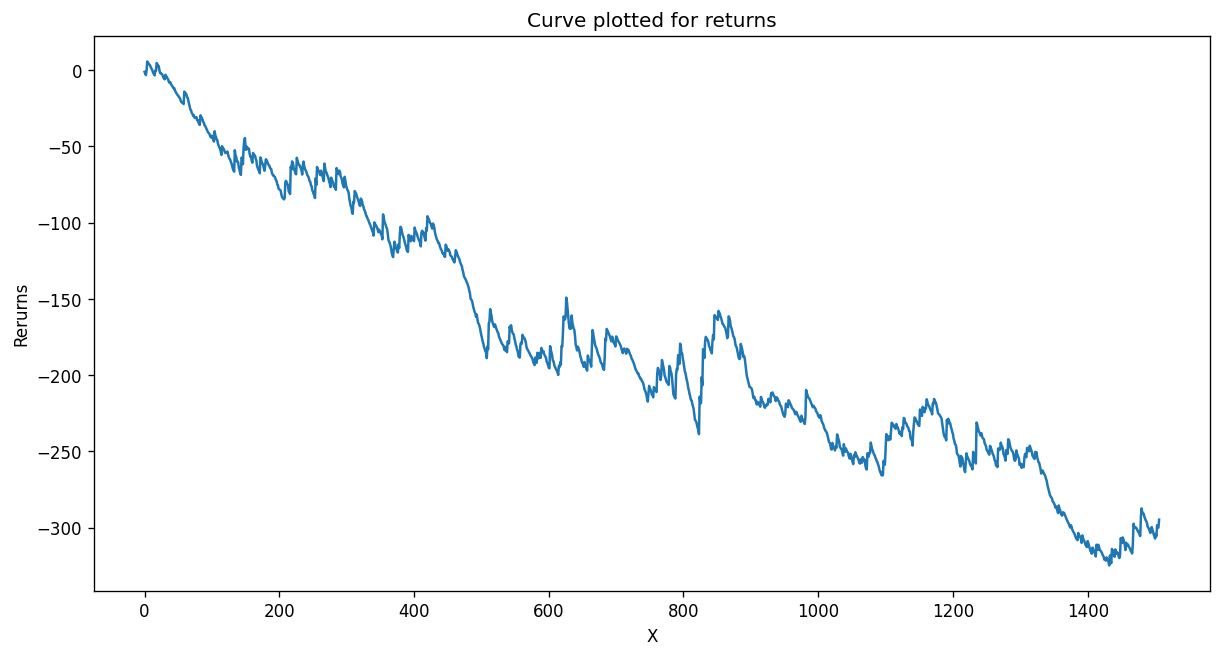

In [15]:
copy_trades = stats['_trades'].copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()